In [1]:
ls

classification_rep_GB.csv             kaggle-toxic-comments.ipynb
classification_rep_log_reg.csv        sample_submission.csv
classification_rep_multinomialNB.csv  test.csv
cnf_matrix_GB.png                     test_labels.csv
cnf_matrix_log_reg.png                train.csv
cnf_matrix_multinomialNB.png


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')

In [4]:
#Disregarded this, since it doesn't have target label. Decided to split the 'train' data into train and test in lieu.
test = pd.read_csv("test.csv")

In [5]:
#train.info()
train.describe().transpose()
#Check for any null data
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [6]:
#train.iloc[20:30]
train.head(6)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0


In [7]:
test.head(6)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [9]:
print('\n',train["comment_text"][0])


 Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


In [10]:
train.obscene[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    0
8    0
9    0
Name: obscene, dtype: int64

In [11]:
# This is for preprocessing - removing stop words, and yields term frequency
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = train['comment_text']
y = train.drop(['comment_text','id'],axis=1)

In [14]:
#max_features=1500 to limit the no. features (no. unique words -> features)
#Could set min_df to specify the min. no. of documents in which a word needs to be found so that it 'qualify' as a feature.
#Could also set max_df to specify the max. percentage of docs in which a word is contained, since if the word is ubiquitous in the corpus, it is meaningless, no insight.
count_vec = CountVectorizer(max_features=1000)

In [15]:
X = count_vec.fit_transform(X)

In [16]:
count_vec.vocabulary_.get('beautiful')

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
#If TfidfVectorizer is used, it incorporates the CountVectorizer, would be more simple.
transformer = TfidfTransformer()

In [19]:
#fit_transform = Fit and transform in one step
#Fit computes the required TF*IDF for each word, then transform actually does the transformation based on the fit()
#Q. Is it ok to perform fit on the entire X? Since later this is split to X_test. Would this cause data leakage?
#https://datascience.stackexchange.com/questions/100349/splitting-before-tfidf-or-after

X_tfidf = transformer.fit_transform(X)

In [20]:
X_tfidf.shape

(159571, 1000)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
naive_model = MultinomialNB()
log_reg = LogisticRegression(random_state=42)
rand_model = RandomForestClassifier()
grad_model = GradientBoostingClassifier()

In [23]:
train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [25]:
#Grid search for this multilabel, binary classification not yet implemented due to error I am not sure of.
#ValueError: Invalid parameter naive_classifier for estimator Pipeline(steps=[('multinomialnb', MultinomialNB())]). Check the list of available parameters with `estimator.get_params().keys()`.

#GridSearchCV for multilabel (6 labels) + 2 classes FOR EACH label = multilabel and binary. since it's a binary classification with multiple output/lables/target, OVR can be deployed.

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

#first attempt
# params = {'alpha':[0,0.001,0.1,1,10,100]}
# searcher = GridSearchCV(estimator=naive_model,param_grid=params)
# searcher.fit(X_train,y_train)
# searcher.best_params_

#second attempt
# naive_classifier = OneVsRestClassifier(
#     make_pipeline(naive_model)
#     #Should achieve the same thing, except using Pipeline, and not make_pipeline, the step is explicitly specified
#     #Pipeline([("multinomialnb", naive_model)])
# )

# param_grid = {'estimator__naive_classifier__alpha': [0,0.001,0.1,1,10,100]}

# grid_search = GridSearchCV(naive_classifier, param_grid=param_grid,cv=5, scoring = 'f1_micro')
# grid_search.fit(X_train, y_train)


In [26]:
#clf = classifier
# Target cardinality, the no. of unique value in the label column = 2(0 or 1), no. labels/target = 6
#Could use multioutput classifier as well, but since this is (although multi label) binary classification per label, OVR is fine.
clf = OneVsRestClassifier(naive_model).fit(X_train, y_train)

In [27]:
clf.predict(count_vec.transform(['That a**hole!',"Bitch!","Fuck you!"]))

array([[0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 1, 0, 1, 0]])

In [28]:
from sklearn.metrics import plot_confusion_matrix, classification_report, ConfusionMatrixDisplay, confusion_matrix,accuracy_score

In [29]:
np.array(y_test)[:,1]


array([0, 0, 0, ..., 0, 0, 0])

In [30]:
type(np.array(y_test))

numpy.ndarray

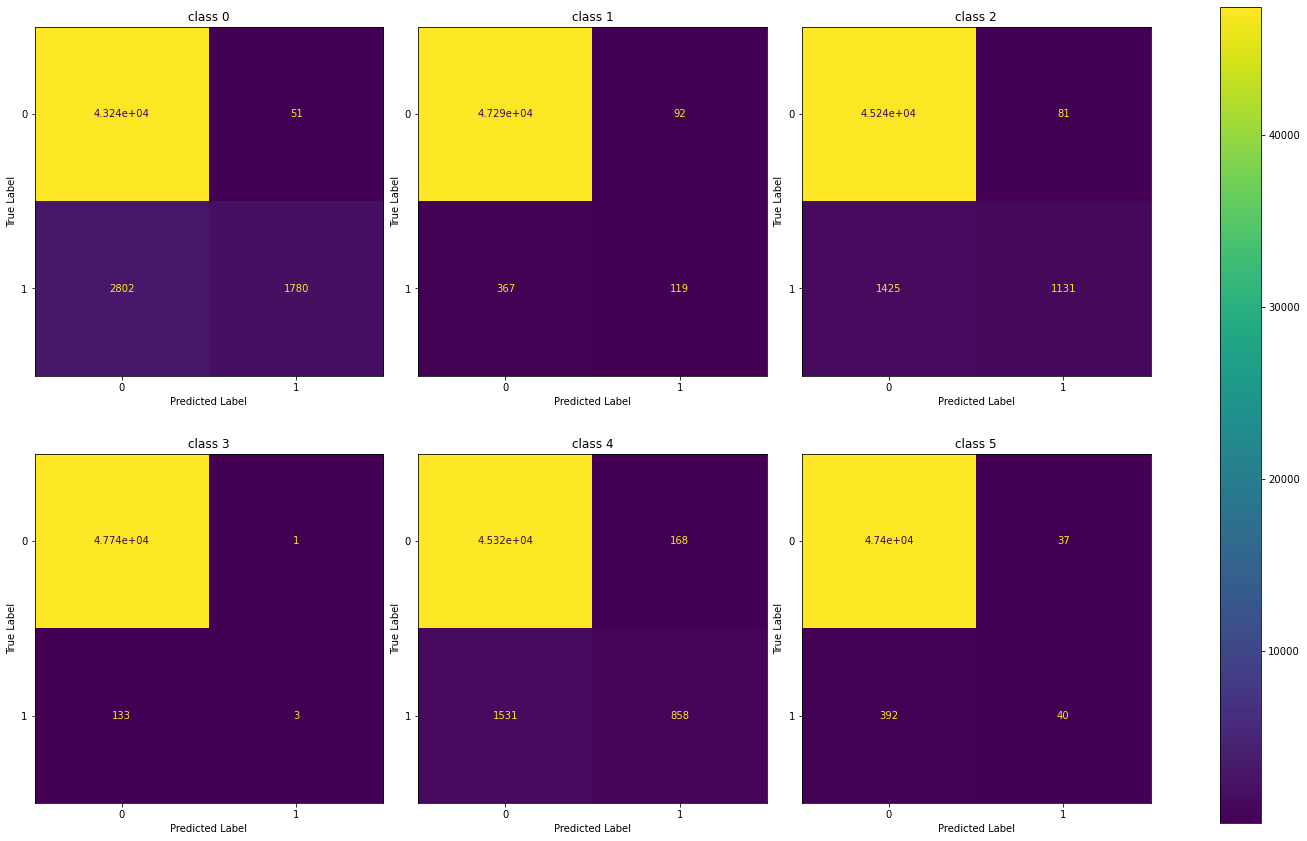

In [31]:
#Tweaked the following
#https://stackoverflow.com/questions/62722416/plot-confusion-matrix-for-multilabel-classifcation-python

y_pred = clf.predict(X_test)

f, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.ravel()
for i in range(6):
    disp = ConfusionMatrixDisplay(confusion_matrix(np.array(y_test)[:, i],y_pred[:, i]))
    disp.plot(ax=axes[i], values_format='.4g')
    disp.ax_.set_title(f'class {i}')
    disp.ax_.set_xlabel('Predicted Label')
    disp.ax_.set_ylabel('True Label')
    disp.im_.colorbar.remove()

plt.subplots_adjust(wspace=0.10, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
#plt.savefig('cnf_matrix_multinomialNB.png')

In [32]:
for i in range(6):
    #print(confusion_matrix(np.array(y_test)[:, i],y_pred[:, i]))
    rep = print(classification_report(np.array(y_test)[:, i],y_pred[:, i]))
    #print(accuracy_score(np.array(y_test)[:, i],y_pred[:, i]))
    dataframe_report = pd.DataFrame(rep)
    dataframe_report.to_csv("classification_rep_multinomialNB.csv")

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43290
           1       0.97      0.39      0.56      4582

    accuracy                           0.94     47872
   macro avg       0.96      0.69      0.76     47872
weighted avg       0.94      0.94      0.93     47872

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     47386
           1       0.56      0.24      0.34       486

    accuracy                           0.99     47872
   macro avg       0.78      0.62      0.67     47872
weighted avg       0.99      0.99      0.99     47872

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     45316
           1       0.93      0.44      0.60      2556

    accuracy                           0.97     47872
   macro avg       0.95      0.72      0.79     47872
weighted avg       0.97      0.97      0.96     47872

              preci